Analysis

In [212]:
# Imports

import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import emoji
import re
import en_core_web_sm

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk import FreqDist

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
import plotly.io as io

In [213]:
# Building Filename
year = '2019'   # 2019, 2020, 2021
subreddit = 'Pathfinder2e' # ['Pathfinder2e','MouseGuard','Pathfinder_RPG','DnD','CallofCthulhu','shadowrun']

base = './my-dataset/'

textdir = base + 'textfiles'
datadir = base + 'datafiles'
imagedir = base + 'imagefiles'

In [214]:
plot_title = 'TextBlob Analysis of ' + subreddit + ' Subreddit for year ' + str(year)

# filename paths
text_filename_path = textdir + '/' + subreddit + '-' + str(year) + '.csv'

data_filename_path = datadir + '/' + subreddit + '-' + str(year) + '.csv'

plot_filename_path = imagedir + '/' + subreddit + '-' + str(year) + '.png'

stop = stopwords.words('english')

In [215]:
# Load up csv containing text

data = pd.read_csv(text_filename_path)[['0']]

# rename column '0' to 'text'

data.rename(columns={'0':'text'}, inplace=True)

# create new column in data DF named 'tb sentiment', fill it with the TextBlob sentiment analysis of the 'text' column

data['tb sentiment'] = data['text'].apply(lambda raw: TextBlob(raw).sentiment)

data['tb polarity'] = data['text'].apply(lambda raw: TextBlob(raw).polarity)

data['tb subjectivity'] = data['text'].apply(lambda raw: TextBlob(raw).subjectivity)

data['Polarity'] = data['tb polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
data['Subjectivity'] = data['tb subjectivity'].apply(lambda x: 'More Objective' if x <= .5 else 'More Subjective')

average_polarity = (data['tb polarity'].sum())/(len(data['tb polarity']))

average_subjectivity = (data['tb subjectivity'].sum())/(len(data['tb subjectivity']))

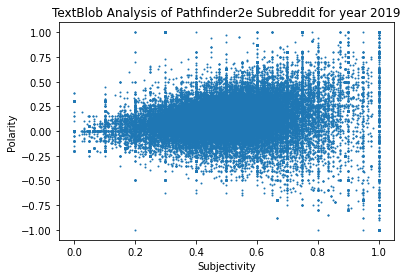

In [216]:
plt.scatter(data['tb subjectivity'], data['tb polarity'], s=1)
plt.title(plot_title)
plt.xlabel("Subjectivity")
plt.ylabel("Polarity")

plt.savefig(plot_filename_path)
data.to_csv(data_filename_path)

plt.show()

In [217]:
filename = './my-dataset/textfiles/' + subreddit + '-' + year + '.csv'

df = pd.read_csv(filename, usecols=['0'])

df.rename(columns={'0':'text'}, inplace=True)

textlist = df.text.values.tolist()

clean = textlist

clean = [str(i) for i in clean]

clean = ' , '.join(clean)

In [218]:
# remove emoji
clean = emoji.demojize(clean)

# remove urls
clean = re.sub(r'http?\S+', '', clean)

# tokenize and clean
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
clean = tokenizer.tokenize(clean)

In [219]:
# lower case

clean = [word.lower() for word in clean]

# remove stopwords

nlp = en_core_web_sm.load()

all_stopwords = nlp.Defaults.stop_words

clean = [word for word in clean if not word in all_stopwords]

In [220]:
# lemmatizing

lemmatizer = WordNetLemmatizer()

clean = ([lemmatizer.lemmatize(w) for w in clean])

In [221]:
## Sentiment Analysis

sia = SIA()
results = []

for sentences in clean2:
    pol_score = sia.polarity_scores(sentences)
    pol_score['words'] = sentences
    results.append(pol_score)

pd.set_option('display.max_columns', None, 'max_colwidth', None)
dataf = pd.DataFrame.from_records(results)

dataf['label'] = 0

dataf.loc[dataf['compound'] > 0.10, 'label'] = 1
dataf.loc[dataf['compound'] < -0.10, 'label'] = -1

In [222]:
# Label Counts for each word
dataf.label.value_counts()

 0    21565
 1     2679
-1     1583
Name: label, dtype: int64

In [223]:
dataf

,neg,neu,pos,compound,words,label
0,0.0,0.0,1.0,0.4019,help,1
1,0.0,1.0,0.0,0.0000,custom,0
2,0.0,1.0,0.0,0.0000,gm,0
3,0.0,1.0,0.0,0.0000,screen,0
4,0.0,1.0,0.0,0.0000,round,0
...,...,...,...,...,...,...
25822,0.0,1.0,0.0,0.0000,handout,0
25823,0.0,0.0,1.0,0.3612,thank,1
25824,0.0,0.0,1.0,0.2960,share,1
25825,0.0,1.0,0.0,0.0000,stuff,0


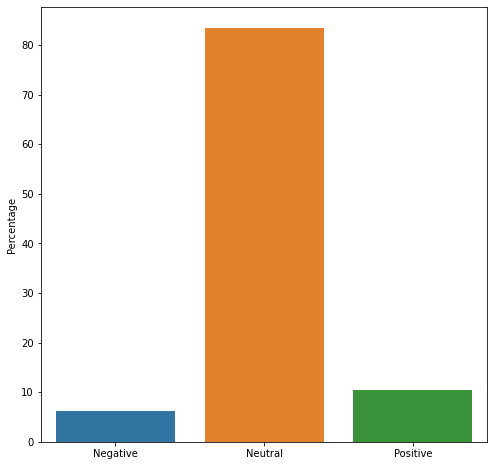

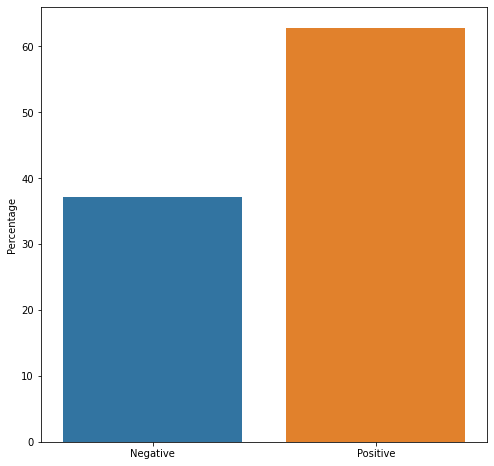

In [224]:
# representation of word sentiment

fig, ax = plt.subplots(figsize=(8,8))
counts = dataf.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral', 'Positive'])
ax.set_ylabel("Percentage")

chart_name = imagedir + '/' + subreddit + '-' + year + '-chart.png'
plt.savefig(chart_name) #save to file

plt.show()

df_pos_neg = dataf.loc[dataf['label'] != 0]

# print(df_pos_neg.label.value_counts())

fig, ax = plt.subplots(figsize=(8,8))

counts = df_pos_neg.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Positive'])
ax.set_ylabel("Percentage")

pos_neg_chart_name = imagedir + '/' + subreddit + '-' + year + '-percentchart.png'
plt.savefig(pos_neg_chart_name)

plt.show()

In [225]:
positive_words = list(dataf.loc[dataf['label'] == 1].words)


pos_frequency = FreqDist(positive_words)
pos_freq = pos_frequency.most_common(20)

# print(pos_freq)

negative_words = list(dataf.loc[dataf['label'] == -1].words)

neg_frequency = FreqDist(negative_words)
neg_freq = neg_frequency.most_common(20)

# print(neg_freq)

In [226]:
# Wordcloud redux

Pos_words = pd.DataFrame(positive_words, columns = ['text'])  # 1 column dataframe of positive words
Pos_words_string = " ".join(cat.split()[0] for cat in Pos_words.text) # covert to string

Neg_words = pd.DataFrame(negative_words, columns = ['text']) # 1 column dataframe of negative words
Neg_words_string = " ".join(cat.split()[0] for cat in Neg_words.text) # covert to string

# create and generate a word cloud image
wordcloud_positive = WordCloud(background_color='white').generate(Pos_words_string)
wordcloud_negative = WordCloud().generate(Neg_words_string)

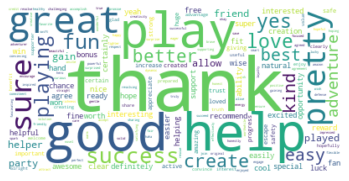

In [227]:
# Display postive wordcloud
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

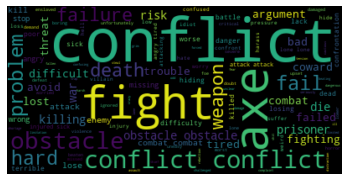

In [228]:
# Display negative wordcloud
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

In [229]:
# save wordclouds to file

pos_cloud_name = imagedir + '/' + subreddit + '-' + year + '-cloud-positive.png'
neg_cloud_name = imagedir + '/' + subreddit + '-' + year + '-cloud-negative.png'

wordcloud_positive.to_file(pos_cloud_name)
wordcloud_negative.to_file(neg_cloud_name)

In [230]:
# Bar Chart of Most Common Positive Words by Count

pos_freq_df = pd.DataFrame(pos_freq)
pos_freq_df = pos_freq_df.rename(columns = {0: 'Bar Graph of Frequent Words', 1: 'Count'}, inplace = False)

fig = px.bar(pos_freq_df, x= 'Bar Graph of Frequent Words', y = 'Count', title = 'Commonly Used Positive Words by Count')
fig.show()

pos_freq_filename = imagedir + '/' + subreddit + '-' + year + '-positive-frequency.png'
fig.write_image(pos_freq_filename)

neg_freq_df = pd.DataFrame(neg_freq)
neg_freq_df = neg_freq_df.rename(columns = {0: 'Bar Graph of Frequent Words', 1: 'Count'}, inplace = False)

fig = px.bar(neg_freq_df, x= 'Bar Graph of Frequent Words', y = 'Count', title = 'Commonly Used Negative Words by Count')

fig.show()

neg_freq_filename = imagedir + '/' + subreddit + '-' + year + '-negative-frequency.png'
fig.write_image(neg_freq_filename)

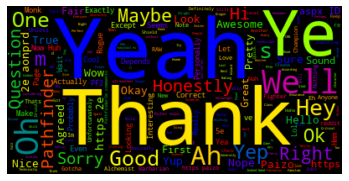

In [231]:
# load in the dataframe

df = pd.read_csv(text_filename_path)[['0']]

df.rename(columns={"0":"selftext"}, inplace=True)

# dataframe to one large string variable
text = " ".join(cat.split()[0] for cat in df.selftext)

stopwords = set(STOPWORDS)

stopwords.add('deleted')
stopwords.add('removed')

wordcloud = WordCloud(colormap='prism', stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

cloud_filename = imagedir + '/' + subreddit + '-' + year + '-wordcloud.png' 

wordcloud.to_file(cloud_filename)